## Importing libraries and data

In [4]:
#importing libraries
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm
import os
import warnings 

warnings.filterwarnings("ignore")

plt.style.use('fivethirtyeight')

In [7]:
#importing data
path = r'C:\Users\Admin\Documents\Data Analytics Course\Achievement 6\Texas School Nutrition Program Analysis\02 Data'
df = pd.read_csv(os.path.join(path,'Prepared Data', 'SchoolNutritionPrograms_Merged.csv'), index_col=[0]) 

In [8]:
df.head()

,ReportType,CEID,CEName,TypeOfAgency,TypeOfOrg,ESC,TDARegion,SiteID,SiteName,CountyDistrictCode,...,LunchServedPaid,SnackDays,BreakfastReimbursement,LunchReimbursement,SnackReimbursement,TotalReimbursement,TotalFreeRedcEligQty,Normalized_FreeRedcElig,Normalized_LunchADP,Normalized_LunchTotal
0,SCHOOLNUTRITIONPROGRAMCLAIMS,4,NECHES ISD,Educational Institution,Public,7,2,102,NECHES ELEMENTARY,001-906,...,0.0,19.0,0.00,0.00,263.0,263.00,250.0,100.000000,0.000000,0.000000
1,SCHOOLNUTRITIONPROGRAMCLAIMS,5,PALESTINE ISD,Educational Institution,Public,7,2,1,PALESTINE H S,001-907,...,930.0,0.0,6436.46,29107.95,0.0,35544.41,922.0,89.168279,59.291103,830.077369
2,SCHOOLNUTRITIONPROGRAMCLAIMS,5,PALESTINE ISD,Educational Institution,Public,7,2,41,PALESTINE MIDDLE,001-907,...,554.0,14.0,3522.97,17362.51,45.0,20930.48,444.0,89.156627,73.421687,1027.911647
3,SCHOOLNUTRITIONPROGRAMCLAIMS,5,PALESTINE ISD,Educational Institution,Public,7,2,101,NORTHSIDE PRI,001-907,...,435.0,14.0,2103.31,13616.40,32.0,15751.71,436.0,89.161554,58.648262,821.063395
4,SCHOOLNUTRITIONPROGRAMCLAIMS,5,PALESTINE ISD,Educational Institution,Public,7,2,102,WASHINGTON EARLY CHILDHOOD CENTER,001-907,...,269.0,0.0,5449.41,8409.61,0.0,13859.02,201.0,89.333333,78.728889,1102.222222


In [9]:
df.shape

(56942, 38)

In [10]:
df.columns

Index(['ReportType', 'CEID', 'CEName', 'TypeOfAgency', 'TypeOfOrg', 'ESC',
       'TDARegion', 'SiteID', 'SiteName', 'CountyDistrictCode', 'CECounty',
       'SiteCounty', 'ClaimDate', 'EnrollmentQty', 'FreeEligQty',
       'RedcEligQty', 'PaidEligQty', 'BreakfastDays', 'BreakfastTotal',
       'BreakfastADP', 'BreakfastServedFree', 'BreakfastServedRedc',
       'BreakfastServedPaid', 'LunchDays', 'LunchTotal', 'LunchADP',
       'LunchServedFree', 'LunchServedRedc', 'LunchServedPaid', 'SnackDays',
       'BreakfastReimbursement', 'LunchReimbursement', 'SnackReimbursement',
       'TotalReimbursement', 'TotalFreeRedcEligQty', 'Normalized_FreeRedcElig',
       'Normalized_LunchADP', 'Normalized_LunchTotal'],
      dtype='object')

## Cleaning Data

### Adding new column

In [11]:
# adding new column for total free/redc lunch served
df['LunchServedFreeRedc'] = (df['LunchServedFree'] + df['LunchServedRedc'])

In [12]:
df.shape

(56942, 39)

In [13]:
df.columns

Index(['ReportType', 'CEID', 'CEName', 'TypeOfAgency', 'TypeOfOrg', 'ESC',
       'TDARegion', 'SiteID', 'SiteName', 'CountyDistrictCode', 'CECounty',
       'SiteCounty', 'ClaimDate', 'EnrollmentQty', 'FreeEligQty',
       'RedcEligQty', 'PaidEligQty', 'BreakfastDays', 'BreakfastTotal',
       'BreakfastADP', 'BreakfastServedFree', 'BreakfastServedRedc',
       'BreakfastServedPaid', 'LunchDays', 'LunchTotal', 'LunchADP',
       'LunchServedFree', 'LunchServedRedc', 'LunchServedPaid', 'SnackDays',
       'BreakfastReimbursement', 'LunchReimbursement', 'SnackReimbursement',
       'TotalReimbursement', 'TotalFreeRedcEligQty', 'Normalized_FreeRedcElig',
       'Normalized_LunchADP', 'Normalized_LunchTotal', 'LunchServedFreeRedc'],
      dtype='object')

In [14]:
df.head()

,ReportType,CEID,CEName,TypeOfAgency,TypeOfOrg,ESC,TDARegion,SiteID,SiteName,CountyDistrictCode,...,SnackDays,BreakfastReimbursement,LunchReimbursement,SnackReimbursement,TotalReimbursement,TotalFreeRedcEligQty,Normalized_FreeRedcElig,Normalized_LunchADP,Normalized_LunchTotal,LunchServedFreeRedc
0,SCHOOLNUTRITIONPROGRAMCLAIMS,4,NECHES ISD,Educational Institution,Public,7,2,102,NECHES ELEMENTARY,001-906,...,19.0,0.00,0.00,263.0,263.00,250.0,100.000000,0.000000,0.000000,0.0
1,SCHOOLNUTRITIONPROGRAMCLAIMS,5,PALESTINE ISD,Educational Institution,Public,7,2,1,PALESTINE H S,001-907,...,0.0,6436.46,29107.95,0.0,35544.41,922.0,89.168279,59.291103,830.077369,7653.0
2,SCHOOLNUTRITIONPROGRAMCLAIMS,5,PALESTINE ISD,Educational Institution,Public,7,2,41,PALESTINE MIDDLE,001-907,...,14.0,3522.97,17362.51,45.0,20930.48,444.0,89.156627,73.421687,1027.911647,4565.0
3,SCHOOLNUTRITIONPROGRAMCLAIMS,5,PALESTINE ISD,Educational Institution,Public,7,2,101,NORTHSIDE PRI,001-907,...,14.0,2103.31,13616.40,32.0,15751.71,436.0,89.161554,58.648262,821.063395,3580.0
4,SCHOOLNUTRITIONPROGRAMCLAIMS,5,PALESTINE ISD,Educational Institution,Public,7,2,102,WASHINGTON EARLY CHILDHOOD CENTER,001-907,...,0.0,5449.41,8409.61,0.0,13859.02,201.0,89.333333,78.728889,1102.222222,2211.0


In [15]:
df['ClaimDate'].dtypes

dtype('O')

In [16]:
#changing CLaimDate column to datetime data type
df['ClaimDate']= pd.to_datetime(df['ClaimDate'])


### Removing outliers

In [17]:
#checking lower and upper limits
Q1=df['LunchServedFreeRedc'].quantile(0.25)
Q3=df['LunchServedFreeRedc'].quantile(0.75)
IQR=Q3-Q1
print(Q1)
print(Q3)
print(IQR)
Lower_Whisker = Q1 - 1.5*IQR
Upper_Whisker = Q3+1.5*IQR
print(Lower_Whisker, Upper_Whisker)

0.0
2134.0
2134.0
-3201.0 5335.0


In [18]:
#creating new df with outliers removed
df_NoOutliers = df[df['LunchServedFreeRedc']< Upper_Whisker]

In [19]:
df_NoOutliers.shape

(52655, 39)

## Aggregating data for line plot

In [20]:
df_line = (df_NoOutliers.groupby('ClaimDate').agg({'LunchServedFreeRedc': ['sum']}))
df_line

,LunchServedFreeRedc
,sum
ClaimDate,
2020-07-01,98544.0
2020-08-01,4647425.0
2020-09-01,9197471.0
2020-10-01,5913040.0
2020-11-01,3906714.0
2020-12-01,3544755.0
2021-01-01,3871598.0
2021-02-01,3643476.0


In [21]:
type(df_line)

pandas.core.frame.DataFrame

## Line Plot

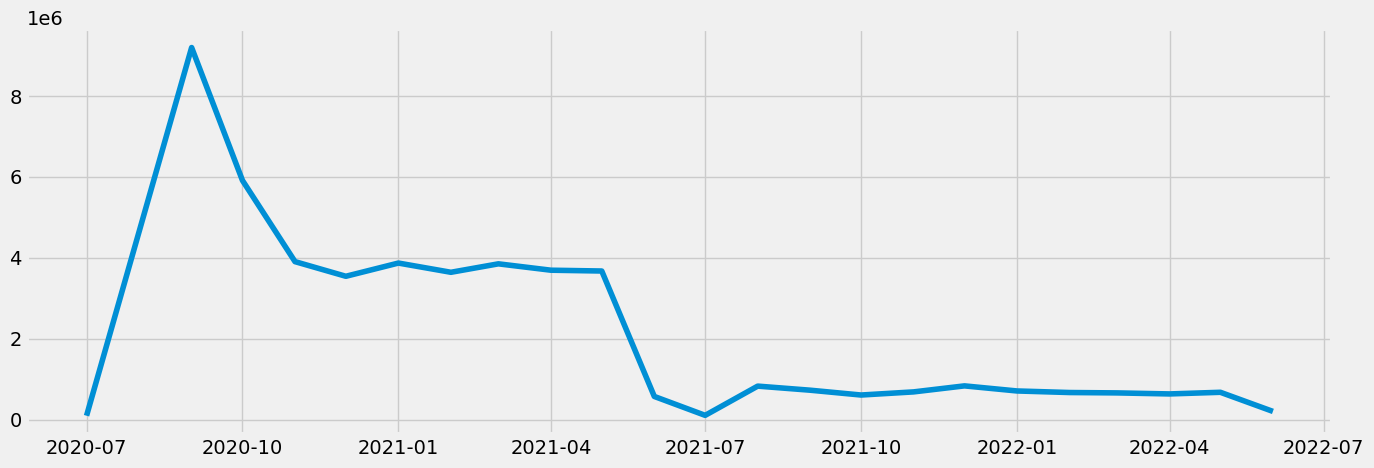

In [22]:
plt.figure(figsize=(15,5), dpi=100)
plt.plot(df_line)

## Decomposition

In [23]:
#using the linear model
decomposition_linear = sm.tsa.seasonal_decompose(df_line, model='additive')

In [24]:
from pylab import rcParams # This will define a fixed size for all special charts.

rcParams['figure.figsize'] = 18, 7

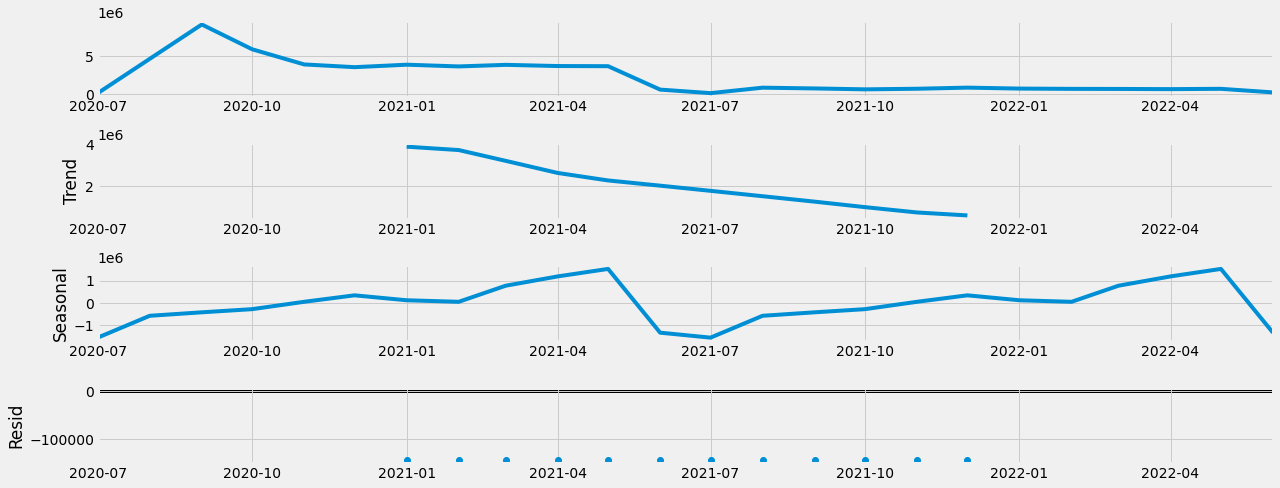

In [25]:
# Plot the separate components

DecompositionChart = (decomposition_linear.plot())
plt.show()

There is a downward trend from the beginning of the year 2021 to the beginning of 2022. In terms of seasonality, there are peaks in the spring months (beginning in Feb and peaking in May) and dips in the summer months (June and July). The latter makes sense, since school is out during those months. There is also some noise from 1/21-1/22.

In [30]:
DecompositionChart.savefig('Decomposition')

## Testing for stationarity

### Dickey Fuller Test

In [27]:
from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(df_line['LunchServedFreeRedc'])

Dickey-Fuller Stationarity test:
Test Statistic                 -4.191287
p-value                         0.000682
Number of Lags Used             8.000000
Number of Observations Used    15.000000
Critical Value (1%)            -3.964443
Critical Value (5%)            -3.084908
Critical Value (10%)           -2.681814
dtype: float64


The test statistic (-4.19) is smaller than the Critical Value 5% (-3.96). Therefore I can reject my null hypothesis. This means there is not a unit root in my data and it is stationary.

### Test for autocorrelations

In [28]:
# import the autocorrelation and partial correlation plots
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf 

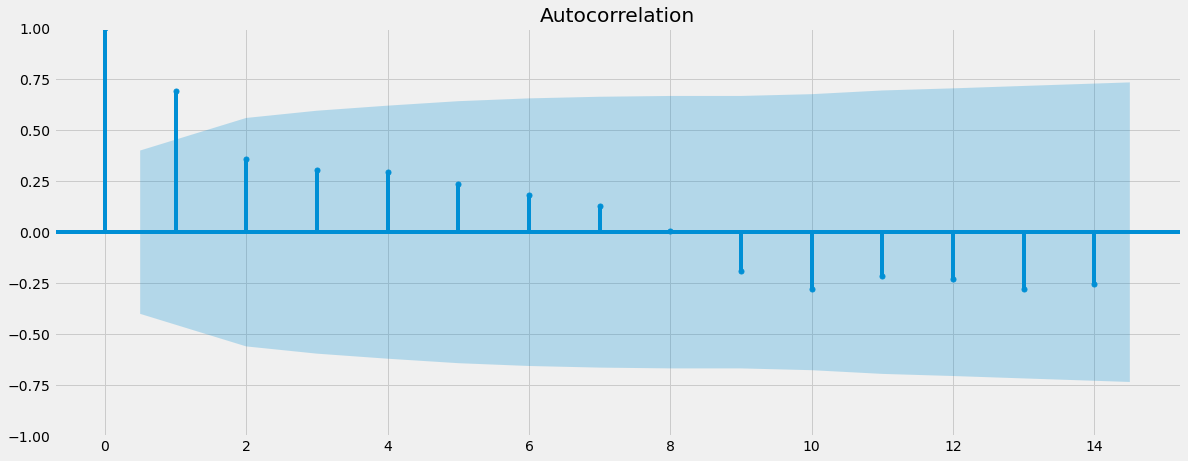

In [31]:
#plot autocorrelation graph
Autocorrelation = (plot_acf(df_line))
plt.show()

The autocorrelation graph shows very few lags that are significantly correlated with each other. I can conclude that my data is stationary.

In [32]:
#save figure
Autocorrelation.savefig('Autocorrelation')